In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [22]:
np.random.seed(27)
tf.random.set_seed(27)

In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [24]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [25]:
# On normalise les données
x_train_fcnn = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test_fcnn = x_test.reshape(-1, 784).astype("float32") / 255.0

# Transformer les étiquettes (labels) sous forme d'entiers (0 à 9) en vecteurs one-hot, c’est-à-dire des vecteurs binaires de taille 10.
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

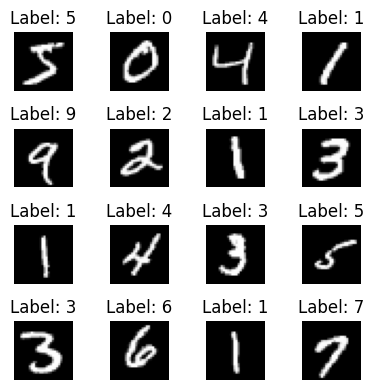

In [26]:
# Voir les dimensions des données
plt.figure(figsize=(4, 4))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [27]:
# Build the model
fcnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])



fcnn_model.compile(
    optimizer=Adam(),
      loss='categorical_crossentropy',
        metrics=['accuracy']
        )

fcnn_model.fit(x_train_fcnn, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)

fcnn_eval = fcnn_model.evaluate(x_test_fcnn, y_test_cat)

print(f"\nFCNN Test Accuracy: {fcnn_eval[1]:.4f}")

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8052 - loss: 0.6942 - val_accuracy: 0.9628 - val_loss: 0.1390
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9525 - loss: 0.1599 - val_accuracy: 0.9723 - val_loss: 0.1019
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9681 - loss: 0.1057 - val_accuracy: 0.9743 - val_loss: 0.0908
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9763 - loss: 0.0777 - val_accuracy: 0.9760 - val_loss: 0.0873
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9828 - loss: 0.0595 - val_accuracy: 0.9772 - val_loss: 0.0840
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9734 - loss: 0.0907

FCNN Test Accuracy: 0.9753


In [40]:
x_train_cnn = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN model...
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.8215 - loss: 0.6009 - val_accuracy: 0.9787 - val_loss: 0.0717
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9776 - loss: 0.0708 - val_accuracy: 0.9845 - val_loss: 0.0523
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9855 - loss: 0.0458 - val_accuracy: 0.9862 - val_loss: 0.0471
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9886 - loss: 0.0354 - val_accuracy: 0.9857 - val_loss: 0.0507
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9913 - loss: 0.0264 - val_accuracy: 0.9850 - val_loss: 0.0531
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9841 - loss: 0.0511

CNN Test Accuracy: 0.9875


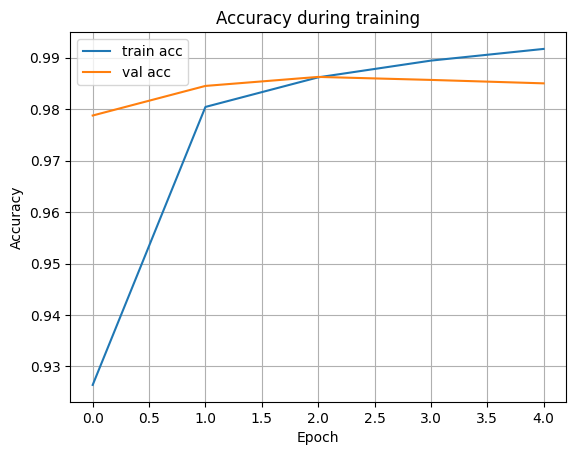

In [50]:
cnn_model = Sequential()
cnn_model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(3, 3)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(
    optimizer=Adam(), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
    )

print("\nTraining CNN model...")

hist = cnn_model.fit(x_train_cnn, y_train_cat, epochs=5, batch_size=128, validation_split=0.2)
cnn_eval = cnn_model.evaluate(x_test_cnn, y_test_cat)

print(f"\nCNN Test Accuracy: {cnn_eval[1]:.4f}")

# 7. Plot training history
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


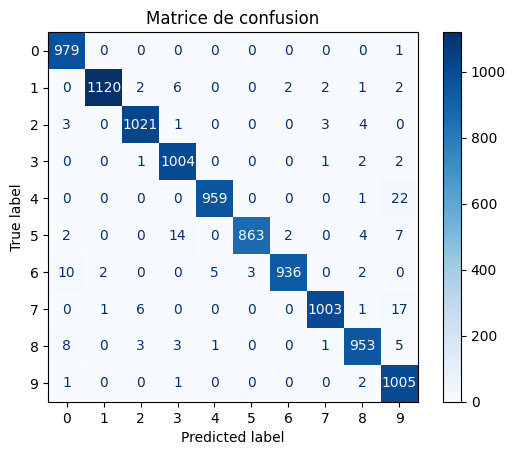

In [51]:
y_pred = cnn_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

Number of misclassified images: 157


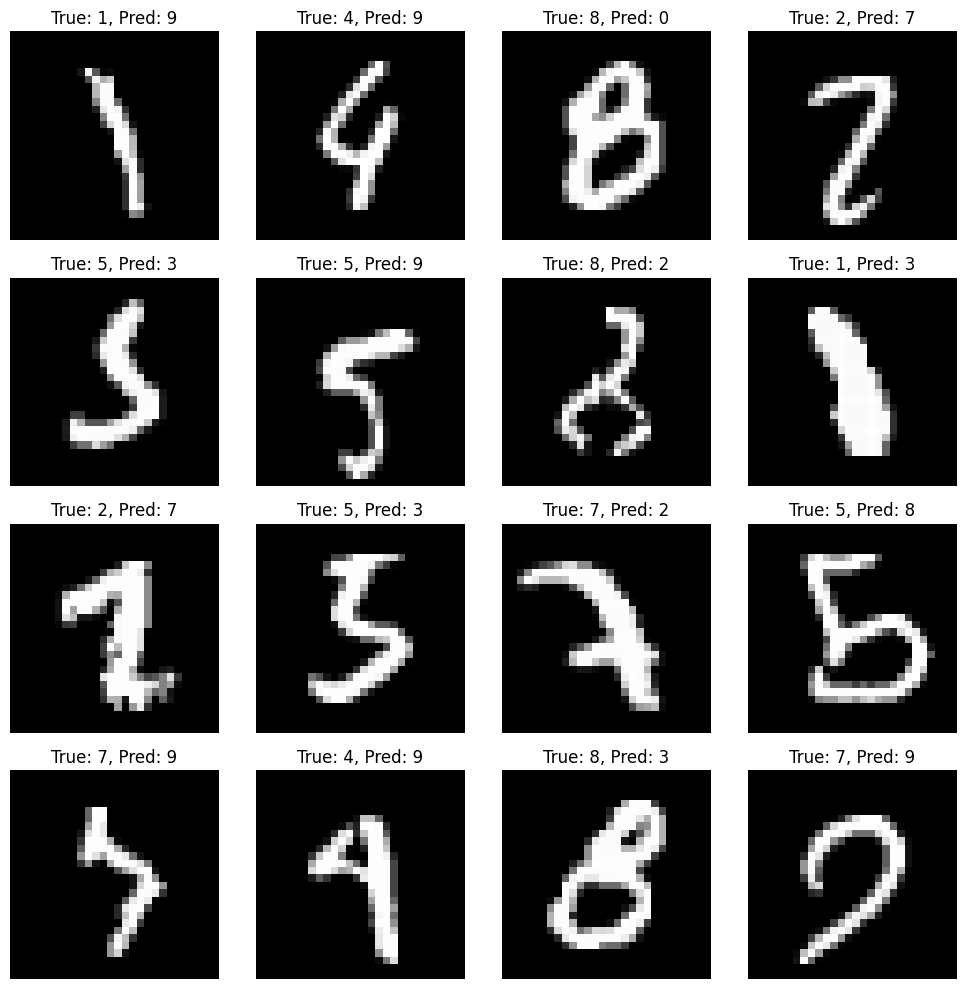

In [52]:
errors = np.where(y_pred_classes != y_test)[0]
print(f"Number of misclassified images: {len(errors)}")
if len(errors) > 0:
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(errors[:16]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(x_test[idx], cmap='gray')
        plt.title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Les 2 models ont une precision élevé pour tous les 2 models mais le CNN model est plus précis mais prends plus de temps.
Par contre celui-ci est plus efficace pour les images avec une résolution plus grande